## importing necessary libraries

In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

## reading and cleaning the dataset

In [308]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.dropna(axis= 0, inplace= True)
df.drop("customerID", axis= "columns", inplace= True) #remove not useful data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# treat the data and transform it into numerical data

In [309]:
df["Churn"] = df["Churn"].map({"Yes": 1 , "No": 0})
df["gender"] = df["gender"].map({"Male": 1 , "Female": 0})
df["Partner"] = df["Partner"].map({"Yes": 1 , "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1 , "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1 , "No": 0})
df["OnlineBackup"] = df["OnlineBackup"].map({"Yes": 1 , "No": 0})
df["TechSupport"] = df["TechSupport"].map({"Yes": 1 , "No": 0})
df["DeviceProtection"] = df["DeviceProtection"].map({"Yes": 1 , "No": 0})
df["StreamingTV"] = df["StreamingTV"].map({"Yes": 1 , "No": 0})
df["StreamingMovies"] = df["StreamingMovies"].map({"Yes": 1 , "No": 0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1 , "No": 0})
df["OnlineSecurity"] = df["OnlineSecurity"].map({"Yes": 1 , "No": 0})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,1,Yes,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,0,No phone service,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.6,1


## one hotting multicategorical columns and removing highly correlated ones to avoid multicolinearity. and cleaning the data

In [310]:
df = pd.get_dummies(df, columns= ["MultipleLines", "InternetService", "Contract", "PaperlessBilling", "PaymentMethod"], drop_first= True)
df = df.apply(pd.to_numeric, errors= 'coerce')
bool_cols= df.select_dtypes(include= "int").columns
df[bool_cols] = df[bool_cols].astype(bool)#converting all ints to bools because they're all 0s and 1s(for memory efficiency)
df.dropna(axis= 0, inplace= True)

In [311]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,False,True,False,True,False,0.0,1.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
1,True,False,False,False,True,True,1.0,0.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,True,True,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,True
3,True,False,False,False,True,False,1.0,0.0,1.0,1.0,...,True,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,True,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,True,True,True,True,1.0,0.0,1.0,1.0,...,False,True,False,False,True,False,True,False,False,True
7039,False,False,True,True,True,True,0.0,1.0,1.0,0.0,...,False,True,True,False,True,False,True,True,False,False
7040,False,False,True,True,True,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
7041,True,True,True,False,True,True,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,True,False,False,True


## making sure all the data is numerical

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5512 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5512 non-null   bool   
 1   SeniorCitizen                          5512 non-null   bool   
 2   Partner                                5512 non-null   bool   
 3   Dependents                             5512 non-null   bool   
 4   tenure                                 5512 non-null   bool   
 5   PhoneService                           5512 non-null   bool   
 6   OnlineSecurity                         5512 non-null   float64
 7   OnlineBackup                           5512 non-null   float64
 8   DeviceProtection                       5512 non-null   float64
 9   TechSupport                            5512 non-null   float64
 10  StreamingTV                            5512 non-null   float64
 11  Streaming

## visualising correlation between features

In [313]:
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.005245,0.028197,0.013940,NaN,-0.009551,-0.017665,-0.013786,0.001218,-0.008291,...,0.009551,-0.006215,-0.011461,NaN,-0.000292,0.004962,-0.009558,-0.000090,0.001306,0.011455
SeniorCitizen,-0.005245,1.000000,0.018216,-0.207502,NaN,0.042203,-0.110155,-0.003253,-0.011162,-0.135289,...,-0.042203,0.114462,0.200824,NaN,-0.051475,-0.100878,0.118466,-0.033569,0.134855,-0.114798
Partner,0.028197,0.018216,1.000000,0.422281,NaN,0.021149,0.171581,0.173154,0.187386,0.144021,...,-0.021149,0.139027,0.001406,NaN,0.105792,0.238660,-0.017570,0.094177,-0.101571,-0.095011
Dependents,0.013940,-0.207502,0.422281,1.000000,NaN,-0.029538,0.157478,0.096695,0.084184,0.136108,...,0.029538,-0.012165,-0.131841,NaN,0.086979,0.171472,-0.090832,0.078273,-0.135462,0.021998
tenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,-0.009551,0.042203,0.021149,-0.029538,NaN,1.000000,-0.037132,0.014632,-0.005223,-0.040368,...,-1.000000,0.357971,0.424662,NaN,-0.011264,-0.041017,0.086362,-0.008304,0.056949,-0.078408
OnlineSecurity,-0.017665,-0.110155,0.171581,0.157478,NaN,-0.037132,1.000000,0.179488,0.170099,0.273270,...,0.037132,0.033684,-0.222298,NaN,0.137746,0.343595,-0.139195,0.139150,-0.238458,0.036515
OnlineBackup,-0.013786,-0.003253,0.173154,0.096695,NaN,0.014632,0.179488,1.000000,0.185021,0.190381,...,-0.014632,0.147274,-0.014056,NaN,0.122254,0.257787,0.006299,0.111449,-0.127821,-0.073532
DeviceProtection,0.001218,-0.011162,0.187386,0.084184,NaN,-0.005223,0.170099,0.185021,1.000000,0.235564,...,0.005223,0.146834,-0.000848,NaN,0.145464,0.328887,-0.022803,0.136819,-0.130950,-0.092512
TechSupport,-0.008291,-0.135289,0.144021,0.136108,NaN,-0.040368,0.273270,0.190381,0.235564,1.000000,...,0.040368,0.035166,-0.211913,NaN,0.132677,0.408903,-0.088187,0.141169,-0.242566,0.031326


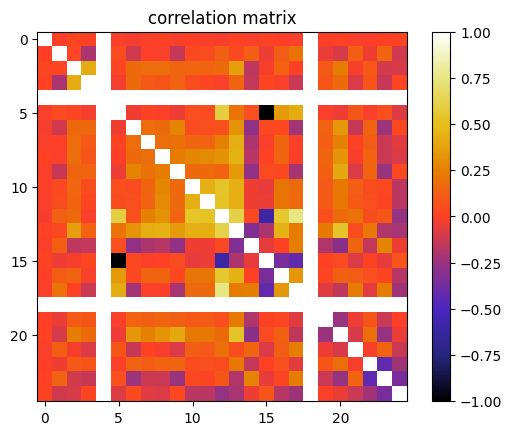

In [314]:
plt.imshow(corr, cmap= "CMRmap")
plt.title("correlation matrix")
plt.colorbar()

## dealing with highly correlated features

In [315]:
threshold= 0.8
high_corr_feat = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if(abs(corr.iloc[i,j]) >= threshold):
            colname = corr.columns[i]
            high_corr_feat.add(colname)

In [316]:
df.drop(columns= high_corr_feat, inplace= True)
print("Columns dropped:", high_corr_feat)

Columns dropped: {'MultipleLines_No phone service'}


In [317]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,False,True,False,True,False,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,False
1,True,False,False,False,True,True,1.0,0.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,True,True,1.0,1.0,0.0,0.0,...,True,False,False,False,False,False,True,False,False,True
3,True,False,False,False,True,False,1.0,0.0,1.0,1.0,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,True,0.0,0.0,0.0,0.0,...,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,True,True,True,True,1.0,0.0,1.0,1.0,...,False,True,False,False,True,False,True,False,False,True
7039,False,False,True,True,True,True,0.0,1.0,1.0,0.0,...,False,True,True,False,True,False,True,True,False,False
7040,False,False,True,True,True,False,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,False
7041,True,True,True,False,True,True,0.0,0.0,0.0,0.0,...,True,True,True,False,False,False,True,False,False,True


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5512 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5512 non-null   bool   
 1   SeniorCitizen                          5512 non-null   bool   
 2   Partner                                5512 non-null   bool   
 3   Dependents                             5512 non-null   bool   
 4   tenure                                 5512 non-null   bool   
 5   PhoneService                           5512 non-null   bool   
 6   OnlineSecurity                         5512 non-null   float64
 7   OnlineBackup                           5512 non-null   float64
 8   DeviceProtection                       5512 non-null   float64
 9   TechSupport                            5512 non-null   float64
 10  StreamingTV                            5512 non-null   float64
 11  Streaming

# *now the data is completely clean and can be worked with*

## let's convert the data from pandas to numpy now to work with it

In [319]:
X_train = df.drop("Churn", axis= "columns").to_numpy().astype(float)
X_train

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [320]:
X_features = df.drop("Churn", axis= "columns").columns.to_numpy()
X_features

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_1', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

## remove columns with zero standard deviation because they do not contribute to the model, so remove nan values

In [321]:
X_features = X_features[~(X_train.std(axis= 0) == 0)]
print(X_features)

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'PhoneService'
 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection' 'TechSupport'
 'StreamingTV' 'StreamingMovies' 'MonthlyCharges' 'TotalCharges'
 'MultipleLines_Yes' 'InternetService_Fiber optic' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_1'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


In [322]:
X_train = X_train[:, ~(X_train.std(axis= 0) == 0)]
X_train

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [323]:
y_train = df["Churn"].to_numpy()
y_train

array([False, False,  True, ..., False,  True, False])

In [324]:
print(X_train.shape)
print(y_train.shape)

(5512, 21)
(5512,)


## normalize the data

In [325]:
def normalize(X):
    mean = X.mean(axis= 0)
    sigma = X.std(axis= 0)
    return ((X - mean) / sigma), mean, sigma

In [326]:
X_norm,u_m,sigma = normalize(X_train)
X_norm

array([[-1.00691798, -0.49648243,  1.03546147, ..., -0.52472421,
         1.2072378 , -0.43262394],
       [ 0.99312955, -0.49648243, -0.96575298, ..., -0.52472421,
        -0.82833722,  2.31147635],
       [ 0.99312955, -0.49648243, -0.96575298, ..., -0.52472421,
        -0.82833722,  2.31147635],
       ...,
       [-1.00691798, -0.49648243,  1.03546147, ..., -0.52472421,
         1.2072378 , -0.43262394],
       [ 0.99312955,  2.01416999,  1.03546147, ..., -0.52472421,
        -0.82833722,  2.31147635],
       [ 0.99312955, -0.49648243, -0.96575298, ..., -0.52472421,
        -0.82833722, -0.43262394]])

## make sure data is clean and all values are numerical and finite

In [327]:
if np.any(np.isnan(X_norm)) or np.any(np.isinf(X_norm)):
    print("Warning: Data contains NaN or infinite values after normalization.")
else:
    print("data is clean and all values are numerical and finite")

data is clean and all values are numerical and finite


## visualise relationship between features

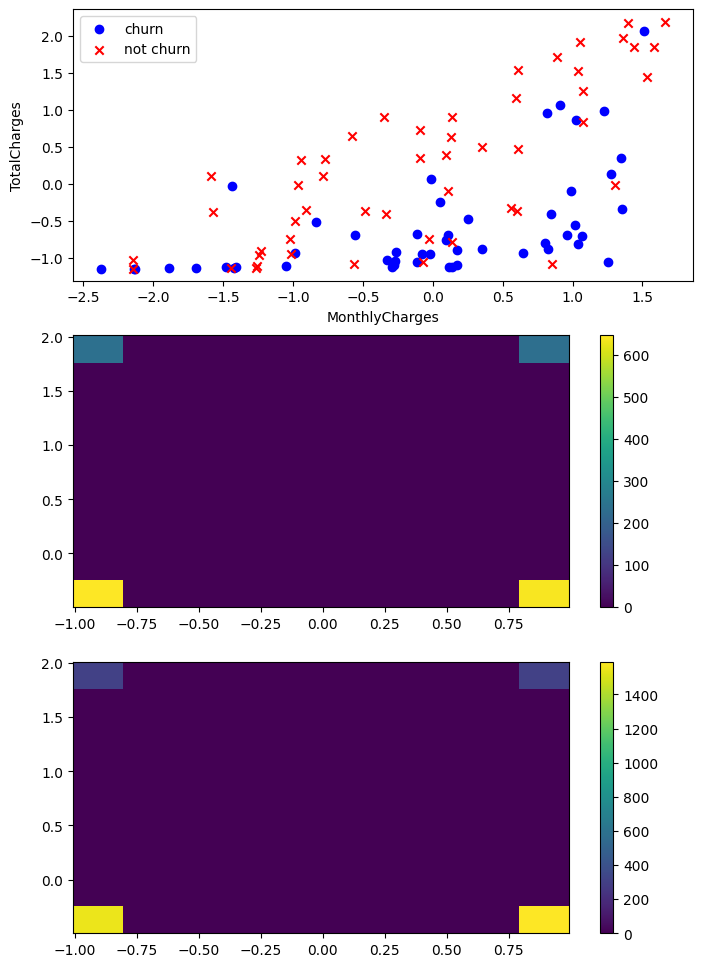

In [328]:
fig,axs = plt.subplots(3,1,figsize= (8,12))
X_true1 = X_norm[y_train == 1,11]
X_true2 = X_norm[y_train == 1,12]
axs[0].scatter(X_true1[:50], X_true2[:50],c= 'b', label= "churn")

X_false1 = X_norm[y_train == 0,11]
X_false2 = X_norm[y_train == 0,12]
axs[0].scatter(X_false1[:50], X_false2[:50],c= 'r', marker= 'x', label = "not churn")
axs[0].set_xlabel(X_features[11])
axs[0].set_ylabel(X_features[12])
axs[0].legend()

h1 = axs[1].hist2d(X_norm[y_train == 1,0],X_norm[y_train == 1,1], cmap='viridis')
fig.colorbar(h1[3], ax=axs[1])

h2 = axs[2].hist2d(X_norm[y_train == 0,0],X_norm[y_train == 0,1], cmap='viridis')
fig.colorbar(h2[3], ax=axs[2])

plt.show()

### from the distribution of the data, the number of parameters and their nature and the complexity of the problem, no feature engineering & regularization is required

### add the bias term to the training data

In [329]:
bias_term = np.ones((X_norm.shape[0], 1))
X_norm = np.hstack((X_norm, bias_term))
X_norm

array([[-1.00691798, -0.49648243,  1.03546147, ...,  1.2072378 ,
        -0.43262394,  1.        ],
       [ 0.99312955, -0.49648243, -0.96575298, ..., -0.82833722,
         2.31147635,  1.        ],
       [ 0.99312955, -0.49648243, -0.96575298, ..., -0.82833722,
         2.31147635,  1.        ],
       ...,
       [-1.00691798, -0.49648243,  1.03546147, ...,  1.2072378 ,
        -0.43262394,  1.        ],
       [ 0.99312955,  2.01416999,  1.03546147, ..., -0.82833722,
         2.31147635,  1.        ],
       [ 0.99312955, -0.49648243, -0.96575298, ..., -0.82833722,
        -0.43262394,  1.        ]])

## initializing the parameters

In [330]:
def initialize(X):
    n = X.shape[1]
    theta = np.random.randn(n)
    return theta

In [331]:
theta = initialize(X_norm)
print(theta.shape)
theta

(22,)


array([-0.33588157,  0.35656938, -0.59982902, -0.38587166,  0.42954882,
       -0.70117178,  0.62029584,  0.345812  ,  0.43356581,  0.19217376,
        0.42253373,  0.81336268,  0.43727698,  0.67802788,  0.11146226,
        1.540079  , -0.27388383,  0.68378547, -1.4377018 ,  1.04174094,
        1.02476624, -1.444528  ])

## make the sigmoid prediction function

In [332]:
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

In [333]:
def predict(theta, x_sample):
    z = np.dot(theta, x_sample)
    pred = sigmoid(z)
    return 1 if (pred >= 0.5) else 0

## making the cost function which is the average over all the examples of the logistic loss

In [334]:
def compute_cost(theta, X, y):
    epsilon = 1e-15 #small constant to prevent log of 0
    
    m = X.shape[0]
    z = np.dot(X, theta)
    preds = sigmoid(z)
    
    preds = np.clip(preds, epsilon, 1 - epsilon) #clipping the predictions to prevent trying to calculate log(0) in the loss computation
    
    loss = -(y * np.log(preds) + (1 - y) * np.log(1 - preds))
    cost = loss.sum() / m
    
    return cost

## making the function that calculates the gradient of the cost

In [335]:
def compute_gradient(theta, X, y):
    m = X.shape[0]
    z = np.dot(X, theta)
    preds = sigmoid(z)
    errs = preds - y
    
    dj_dth = np.dot(X.T, errs) / m
    
    return dj_dth

## making the gradient descent function to train the model with

In [336]:
def gradient_descent(theta_in, X, y, learning_rate, gradient_func, cost_func, num_iters):
    cost_his = []
    theta = copy.deepcopy(theta_in)
    
    for i in range(num_iters):
        theta -= learning_rate * gradient_func(theta, X, y)
        
        cost = cost_func(theta, X, y)
        cost_his.append(cost)
        if(i%(num_iters//10) == 0 or i == num_iters-1):
            print(f"iteration {i}/{num_iters} ::: cost: {cost_his[-1]}")
    return theta, cost_his

## training and evaluating the model

iteration 0/1000 ::: cost: 1.278655174301793
iteration 100/1000 ::: cost: 0.47975995593728166
iteration 200/1000 ::: cost: 0.47780106056394733
iteration 300/1000 ::: cost: 0.4777639331725383
iteration 400/1000 ::: cost: 0.47775899111912734
iteration 500/1000 ::: cost: 0.4777568909397914
iteration 600/1000 ::: cost: 0.47775515162341864
iteration 700/1000 ::: cost: 0.4777534845107002
iteration 800/1000 ::: cost: 0.47775184872025994
iteration 900/1000 ::: cost: 0.4777502370934955
iteration 999/1000 ::: cost: 0.47774866378108666
[-0.01172698  0.07680984 -0.02343028 -0.06228293 -0.19819054 -0.22262672
 -0.1048994  -0.04382052 -0.19752374  0.07427769  0.08009764  0.34133653
 -0.78770322  0.12132366  0.32281218 -0.25663379 -0.49601975  0.15466029
 -0.01209516  0.196191    0.03294844 -1.1526587 ]


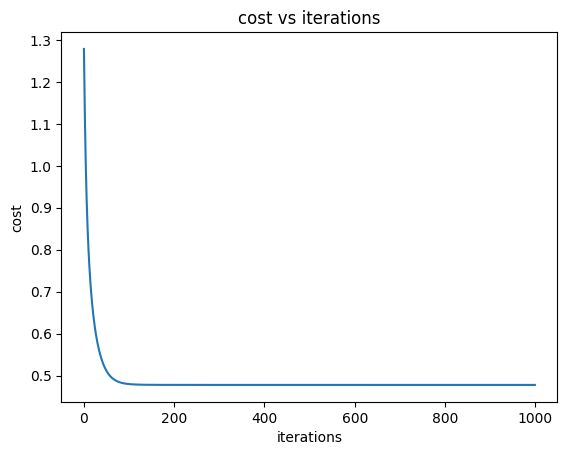

In [337]:
num_iters = 1000

theta_final, training_his = gradient_descent(theta, X_norm, y_train, 0.3, compute_gradient, compute_cost, num_iters)

plt.plot(training_his)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations")
print(theta_final)

## visualizing the model's performance on training data

In [338]:
def evaluate(theta, X, X_features, y, indices):
    i0,i1 = indices
    fig,ax = plt.subplots(1,1)
    X_true1 = X[y == 1,i0]
    X_true2 = X[y == 1,i1]
    ax.scatter(X_true1[:50], X_true2[:50],c= 'b', label= "churn")
    
    X_false1 = X[y == 0,i0]
    X_false2 = X[y_train == 0,i1]
    ax.scatter(X_false1[:50], X_false2[:50],c= 'r', marker= 'x', label = "not churn")
    ax.set_xlabel(X_features[i0])
    ax.set_ylabel(X_features[i1])
    ax.set_title("decision boundary")
    ax.legend()
    
    x0 = np.arange(min(X_true1.min(), X_false1.min()),max(X_true1.max(), X_false1.max()))
    x1 = -(theta[i0] * x0) / theta[i1]
    
    ax.plot(x0,x1)
    
    plt.show()

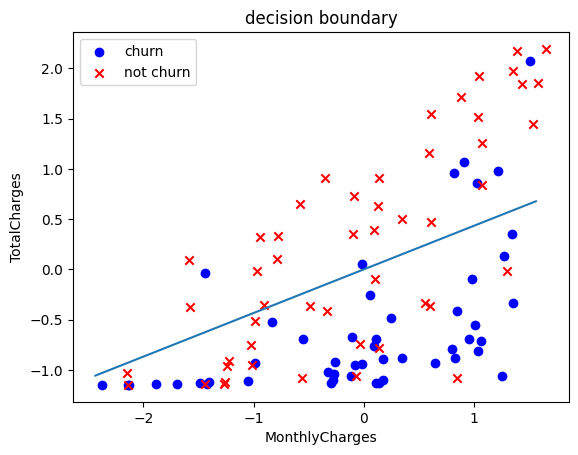

In [339]:
evaluate(theta_final, X_norm, X_features, y_train, (11, 12))

In [340]:
preds = np.array([predict(theta_final, X_norm[i]) for i in range(X_norm.shape[0])])
print("prediction vs real value")
print(np.concatenate((preds[:50].reshape((-1,1)), y_train[:50].reshape((-1,1))), axis= 1))

prediction vs real value
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [341]:
print("precision: ", (preds == y_train).sum() / preds.shape[0])

precision:  0.7659651669085631


## function taking input from user and predicts output with the model

In [353]:
def make_pred(theta, mean, std, X_features):
    print("you will be asked questions about the customer")
    print("if the answer is either yes or no write 1 for yes and 0 for no")
    x = []
    for feature in X_features:
         while True:
             try:
                 if feature in ['MonthlyCharges', 'TotalCharges']:
                     value = float(input(f"enter {feature} in dollars: "))
                 else :
                     if feature == "gender":
                         value = float(input(f"{feature}? 1 for male, 0 for female"))
                     else : 
                         value = float(input(f"{feature}? 1 for yes, 0 for no"))
                     if not value in [0,1]:
                         raise ValueError("input must be either 0 or 1")
                 x.append(value)
                 break
             except ValueError as e:
                 print(e)
                 print(f"please enter a valid {feature}")

    sample = np.array(x)
    sample = (sample - mean) / std
    sample = np.append(sample, 1)
    if predict(theta, sample):
        print("The customer has a high likelihood of churning.")
    else :
        print("The customer is at low risk of churn.")

In [354]:
X_features

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_1',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [355]:
make_pred(theta_final, u_m, sigma, X_features)

you will be asked questions about the customer
if the answer is either yes or no write 1 for yes and 0 for no
The customer has a high likelihood of churning.


#### to use this program you can call make_pred(theta_final, u_m, sigma, X_features)